#  INVESTIGACIÓN CORTA 2: MÉTODOS DE APRENDIZAJE SUPERVISADO

## Librerías y definición de set de datos

importando librerías principales

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Preprocesado de los datos

Se usará el set de datos "IBM HR Analytics Employee Attrition & Performanc" proveniente de https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset 

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

Se realiza un pre procesamiento de los datos para mapear texto a valores números y escoger los 'features' de interés. El objetivo será la cualidad "Attrition" que se usará como 'label'

In [5]:
data['Attrition'] = data['Attrition'].replace({'Yes':1,'No':0})

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Revisamos si existen valores nulos que tengamos que eliminar

In [8]:
data.isnull().any

<bound method DataFrame.any of         Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
5     False      False           False      False       False   
6     False      False           False      False       False   
7     False      False           False      False       False   
8     False      False           False      False       False   
9     False      False           False      False       False   
10    False      False           False      False       False   
11    False      False           False      False       False   
12    False      False           False      False       False   
13    False      False           False      False       Fal

In [9]:
labels = data['Attrition']

In [10]:
features = data[['Age','DistanceFromHome','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','MaritalStatus','MonthlyIncome','NumCompaniesWorked']]

In [11]:
features['MaritalStatus'] = features['MaritalStatus'].replace({'Single':0,'Married':1,'Divorced':2})

In [12]:
features.head()

,Age,DistanceFromHome,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MaritalStatus,MonthlyIncome,NumCompaniesWorked
0,41,1,1,6,4,0,0,5993,8
1,49,8,3,10,7,1,1,5130,1
2,37,2,3,0,0,0,0,2090,6
3,33,3,3,8,7,3,1,2909,1
4,27,2,3,2,2,2,1,3468,9


In [13]:
from sklearn.model_selection import train_test_split

Se crean los conjuntos de entrenamiento y prueba que se usará para todos los métodos

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, random_state=3)

In [15]:
x_train.shape

(1102, 9)

In [16]:
y_train.shape

(1102,)

## Método DecissionTree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 4)

In [19]:
DecisionTreeModel.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_predict_dt = DecisionTreeModel.predict(x_test)

In [22]:
accuracy_score(y_test,y_predict_dt)

0.8342391304347826

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names='Attrition',filled=True)
from subprocess import call


In [87]:
call(['dot','-T','png','simple_tree.dot','-o','simple_tree.png'])

0

<img src='simple_tree.png' width = 1000px>

In [26]:
importances = pd.DataFrame({'features' : x_train.columns, 'importance':DecisionTreeModel.feature_importances_})

In [27]:
importances = importances.sort_values('importance', ascending = False).set_index('features')

In [28]:
importances.head()

,importance
features,
MonthlyIncome,0.332508
MaritalStatus,0.170597
YearsAtCompany,0.165631
Age,0.116165
NumCompaniesWorked,0.112950


In [29]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

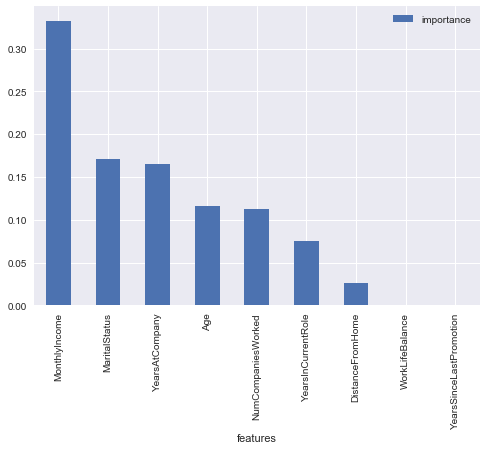

In [30]:
importances.plot.bar()

Agregamos algunas variables más para ver si podemos mejor la precisión

In [31]:
features = data[['Age','DistanceFromHome','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','MaritalStatus','MonthlyIncome','NumCompaniesWorked','BusinessTravel','EnvironmentSatisfaction','Gender','JobSatisfaction']]

In [32]:
features.head()

,Age,DistanceFromHome,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MaritalStatus,MonthlyIncome,NumCompaniesWorked,BusinessTravel,EnvironmentSatisfaction,Gender,JobSatisfaction
0,41,1,1,6,4,0,Single,5993,8,Travel_Rarely,2,Female,4
1,49,8,3,10,7,1,Married,5130,1,Travel_Frequently,3,Male,2
2,37,2,3,0,0,0,Single,2090,6,Travel_Rarely,4,Male,3
3,33,3,3,8,7,3,Married,2909,1,Travel_Frequently,4,Female,3
4,27,2,3,2,2,2,Married,3468,9,Travel_Rarely,1,Male,2


In [33]:
features.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [34]:
features['BusinessTravel'] = features['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})

In [35]:
features['Gender'] = features['Gender'].replace({'Male':0,'Female':1})

In [36]:
features['MaritalStatus'] = features['MaritalStatus'].replace({'Single':0,'Married':1,'Divorced':2})

In [37]:
features.head()

,Age,DistanceFromHome,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MaritalStatus,MonthlyIncome,NumCompaniesWorked,BusinessTravel,EnvironmentSatisfaction,Gender,JobSatisfaction
0,41,1,1,6,4,0,0,5993,8,1,2,1,4
1,49,8,3,10,7,1,1,5130,1,2,3,0,2
2,37,2,3,0,0,0,0,2090,6,1,4,0,3
3,33,3,3,8,7,3,1,2909,1,2,4,1,3
4,27,2,3,2,2,2,1,3468,9,1,1,0,2


In [38]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, random_state=3)

In [39]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

In [40]:
DecisionTreeModel.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
y_predict_dt = DecisionTreeModel.predict(x_test)

In [42]:
accuracy_score(y_test,y_predict_dt)

0.8369565217391305

In [43]:
importances = pd.DataFrame({'features' : x_train.columns, 'importance':DecisionTreeModel.feature_importances_})

In [44]:
importances = importances.sort_values('importance', ascending = False).set_index('features')

In [45]:
importances

,importance
features,
MonthlyIncome,0.374983
MaritalStatus,0.228228
YearsAtCompany,0.221584
EnvironmentSatisfaction,0.102664
JobSatisfaction,0.072541
Age,0.000000
DistanceFromHome,0.000000
WorkLifeBalance,0.000000
YearsInCurrentRole,0.000000


In [46]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

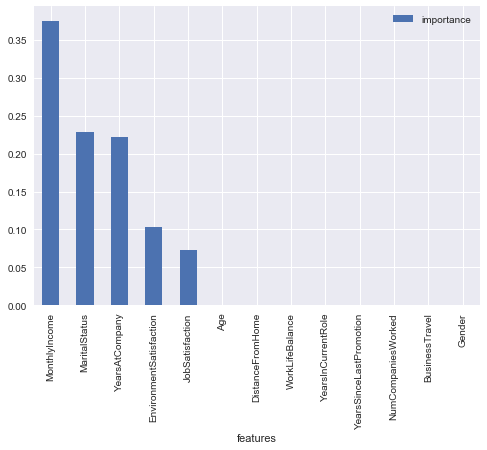

In [47]:
importances.plot.bar()

In [90]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree2.dot', feature_names=features.columns,impurity=False,class_names='Attrition',filled=True)
from subprocess import call
call(['dot','-T','png','simple_tree2.dot','-o','simple_tree2.png'])

0

<img src='simple_tree2.png' width = 1000px>

## Método Random Forest

In [ ]:
Creamos el modelo para el método Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [50]:
RandomForestModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [51]:
y_predict_rf = RandomForestModel.predict(x_test)

In [ ]:
Revisamos la precisión del modelo

In [94]:
print("Training set score: {:.3f}".format(RandomForestModel.score(x_train, y_train)))
print("Test set score: {:.3f}".format(RandomForestModel.score(x_test, y_test)))

Training set score: 0.868
Test set score: 0.851


In [95]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=['Attrision','No Attrision'],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])

0

<img src='complete_tree.png' width = 1000px>

Como lo hicimo con el modelo de DecisionTree obtenemos la importancia de los diferentes features en el módelo creado

In [54]:
importances = pd.DataFrame({'feature' : x_train.columns, 'importance':RandomForestModel.feature_importances_})

In [55]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [56]:
importances.head()

,importance
feature,
MonthlyIncome,0.196669
Age,0.154681
YearsAtCompany,0.109402
DistanceFromHome,0.092036
MaritalStatus,0.072079


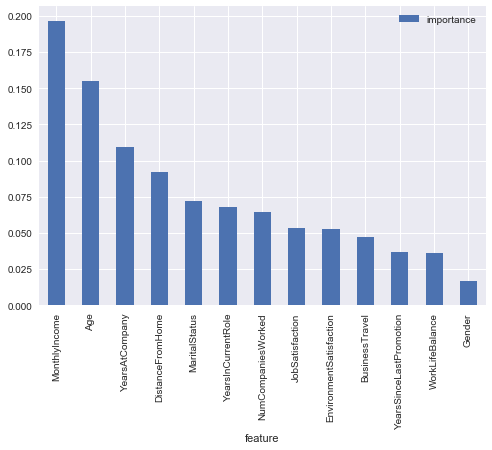

In [57]:
importances.plot.bar()

Como se observa en la figura anterior el "MonthIncome" sigue siendo la variable con mayor peso, pero las demas variables cobran mayor relevancia comparado con el módelo de DecisionTree

## Método kNN 

In [58]:
from sklearn.neighbors import KNeighborsClassifier

Hacemos un cálculo de variando el hiper párametro n_neighbors para obtener el valor óptimo que es caundo la presiciónd el training  y el test son iguales

In [59]:
training_accuracy = []
test_accuracy = []

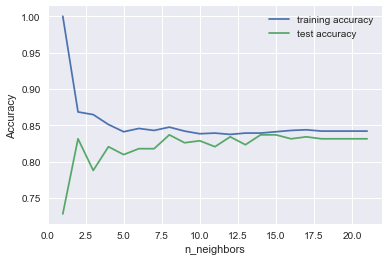

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 22)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(x_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(x_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Dadó el gráfico anterior obtnemos que el valor óptimo es alredeedor de 13 vecinos.

In [98]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [99]:
print("Training set score: {:.3f}".format(clf.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(x_test, y_test)))

Training set score: 0.839
Test set score: 0.823


## Método Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.856
Test set score: 0.853


Mediante una rutina variamos el hiper párametro C del módelo para ver el valor óptimo

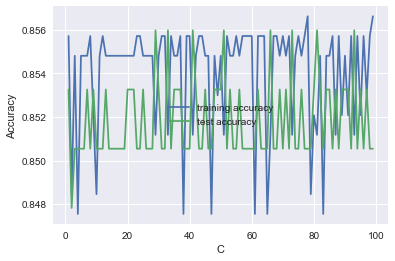

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

training_acc = []
test_acc = []

rango = range(1, 100)
for c in rango:
    # se construye el modelo de clasificacion
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(clf.score(x_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(clf.score(x_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

Dada la figura anterior vemos alredor de 65 tenemos un valor óptimo de C. Sin embargo la variacón es muy poca por lo que este hiper párametro no es determinante.

In [112]:
logreg = LogisticRegression(solver='liblinear', C=65).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.848
Test set score: 0.851


## Método naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
nbg = GaussianNB().fit(x_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(x_test, y_test)))

Training set score: 0.820
Test set score: 0.812


## Método Bagging meta-estimator

Los métodos de ensamble combinan la predicción de otros estimadores para construír un algoritmo de aprendizaje mejorando la generalización

En los métodos de ensamble, el método "Bagging" forma una clase de algoritmos que es contruído de una gran cantidad de instancias de un estimador caja negra con subsets aleatorios del set de datos de entrenamiento original, luego agrega sus propias prediciones para forma una predicción final. 

En este caso usaremos el métido Decision Tree como pare del método Bagging

In [78]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
BG = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
BG.fit(x_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [80]:
print("Accuracy on training set: {:.3f}".format(
svc.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.838
Accuracy on test set: 0.842


## Método Stochastic Gradient Descent

In [81]:
from sklearn.linear_model import SGDClassifier

In [82]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [83]:
clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
print("Accuracy on training set: {:.3f}".format(
clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 0.838
Accuracy on test set: 0.842


In [85]:
y_predict = clf.predict(x_test)

In [86]:
accuracy_score(y_test,y_predict)

0.842391304347826

## Comparar Modelos

Dadas las fórmulas usadas anteriormente para cada método realizamos un gráfico comparativo

DT: 0.850295 (0.027423)
RT: 0.854808 (0.023687)
KNN: 0.833931 (0.035610)
SDC: 0.702776 (0.271432)
NB: 0.813047 (0.039101)
LG: 0.851147 (0.033426)
BG: 0.857543 (0.029258)


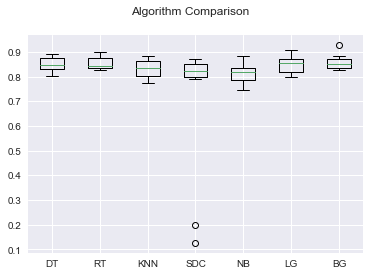

In [123]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DT', DecisionTreeClassifier(max_depth = 3)))
models.append(('RT', RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=13)))
models.append(('SDC', SGDClassifier(loss="hinge", penalty="l2", max_iter=5)))
models.append(('NB', GaussianNB()))
models.append(('LG', LogisticRegression(solver='liblinear', C=65)))
seed2 = 7
cart = DecisionTreeClassifier()
num_trees = 100
models.append(('BG', BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed2)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()